## Association Rule - Groceries Dataset

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
groceries = []

#### As the file is in transaction data we will be reading data directly

In [4]:
with open("groceries.csv") as f:
    groceries = f.read()

splitting the data into separate transactions using separator as "\n"

In [5]:
groceries = groceries.split("\n")
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [6]:
all_groceries_list = [i for item in groceries_list for i in item]

In [7]:
from collections import Counter

item_frequencies = Counter(all_groceries_list)

In [8]:
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [10]:
item_frequencies[:10]

[('baby food', 1),
 ('sound storage medium', 1),
 ('', 1),
 ('preservation products', 2),
 ('bags', 4),
 ('kitchen utensil', 4),
 ('baby cosmetics', 6),
 ('frozen chicken', 6),
 ('toilet cleaner', 7),
 ('make up remover', 8)]

seperating frequencies and items

In [11]:
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

#### Ploting items vs frequencies for top 20 items

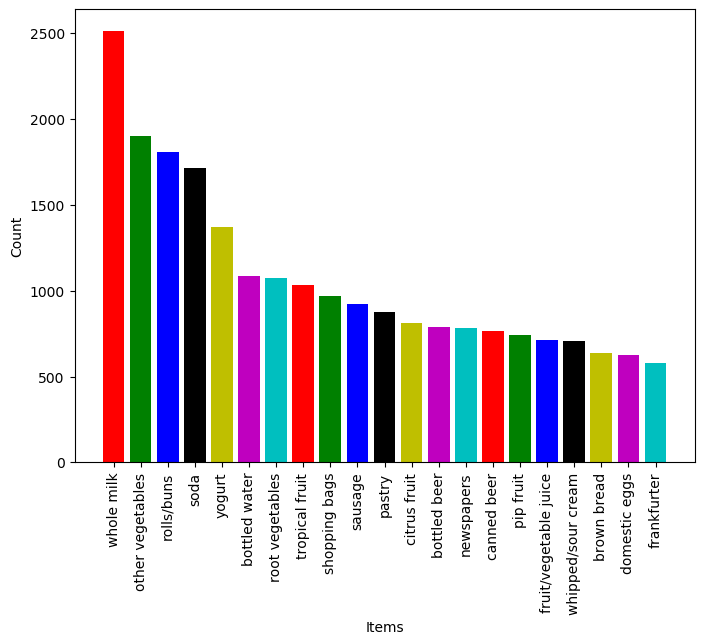

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6),dpi=100)
plt.bar(height = frequencies[0:21],x = list(range(0,21)),color='rgbkymc');
plt.xticks(list(range(0,21),),items[0:21],rotation =90);
plt.xlabel("Items")
plt.ylabel("Count");

#### Now lets create dataframe

In [18]:
groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction

In [19]:
groceries_series.columns = ["transactions"]

In [20]:
groceries_series.head()

,transactions
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."


#### Lets create dummies for transactions 

In [40]:
X = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

In [42]:
X.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)

In [45]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

In [60]:
frequent_itemsets.head()

,support,itemsets
117,0.255516,(whole milk)
73,0.193493,(other vegetables)
88,0.183935,(rolls/buns)
98,0.174377,(soda)
118,0.139502,(yogurt)


In [61]:
frequent_itemsets.tail()

,support,itemsets
874,0.005084,"(newspapers, whole milk, tropical fruit)"
276,0.005084,"(chewing gum, whole milk)"
332,0.005084,"(frankfurter, coffee)"
346,0.005084,"(cream cheese , curd)"
271,0.005084,"(other vegetables, canned fish)"


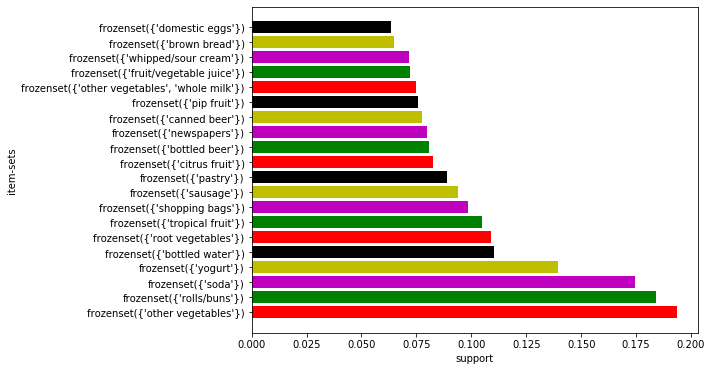

In [56]:
plt.figure(figsize=(8,6))
plt.barh(y = list(range(1,21)),width = frequent_itemsets.support[1:21],color='rgmyk');
plt.yticks(list(range(1,21)),frequent_itemsets.itemsets[1:21],rotation=0)
plt.ylabel('item-sets');
plt.xlabel('support');

In [57]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)

In [62]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2559,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2558,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,0.003988,1.107758
2022,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
2019,"(butter, other vegetables)",(whipped/sour cream),0.020031,0.071683,0.005796,0.289340,4.036397,0.004360,1.306275
1312,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406


Lets remove redundancy from above set of rules

In [63]:
def to_list(i):
    return (sorted(list(i)))

In [64]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [65]:
ma_X = ma_X.apply(sorted)

In [66]:
rules_sets = list(ma_X)

In [67]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [68]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [69]:
max(index_rules)

2698

Getting rules without any redudancy

In [72]:
rules_no_redudancy  = rules.iloc[index_rules,:]

Sorting them with respect to lift and getting top 10 rules 

In [73]:
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2559,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2022,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
1312,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
2041,"(root vegetables, other vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2202,"(pip fruit, citrus fruit)",(tropical fruit),0.013828,0.104931,0.005592,0.404412,3.854060,0.004141,1.502831
777,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
1470,"(whipped/sour cream, whole milk)",(butter),0.032232,0.055414,0.006711,0.208202,3.757185,0.004925,1.192963
2433,"(tropical fruit, curd)",(yogurt),0.010269,0.139502,0.005287,0.514851,3.690645,0.003855,1.773680
1039,"(beef, other vegetables)",(root vegetables),0.019725,0.108998,0.007931,0.402062,3.688692,0.005781,1.490123
1873,(butter),"(domestic eggs, whole milk)",0.055414,0.029995,0.005999,0.108257,3.609174,0.004337,1.087763


In [74]:
len(rules_no_redudancy)

830

In [80]:
support=rules.as_matrix(columns=['support']);
confidence=rules.as_matrix(columns=['confidence']);

C:\Users\ABHAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\ABHAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'confidence')

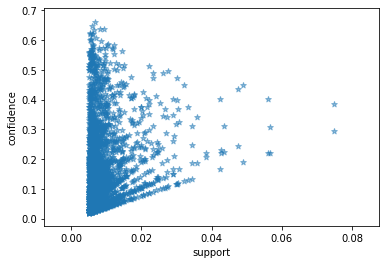

In [85]:
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence')